# Predicting home prices with the k-NN algorithm
Given a vector containing features of a house, we want to be able to predict its price. We use the dataset ''House Sales in King County, USA'', downloaded from kaggle. This is the same dataset that we used for the regression demo. We want to predict a price of a home based on the homes that are closests to it, i.e. have similar properties.

Download the data file [housing.csv](https://docs.google.com/spreadsheets/d/1vk06vuH277_905XORBYQhc4Cf8Poe3BS0AsiBmlzcKA/edit?usp=sharing) to your local directory.<br>
__Update the variable `file_name` in the cell below to point to your local directory where you store the datasets for this course__ and then run the cell.

In [194]:
file_name = "../datasets/housing.csv"

## 1. Predicting home price
### 1.1. Features are numeric

We have the following features:
<ul>
    <li>id - house identifier, numeric.</li>
    <li>price - house price, numeric. <b>This is the target variable that we are trying to predict</b>.</li>
    <li>bedrooms - no. of bedrooms, numeric.</li>
    <li>bathrooms - no. of bathrooms, numeric.</li>
    <li>sqft_living - square footage of the home, numeric.</li>
    <li>sqft_lot - square footage of the lot, numeric.</li>
    <li>floors - no.of floors, numeric.</li>
    <li>waterfront - boolean (0 or 1).</li>
    <li>condition - the amount of wear-and-tear, numeric (from 0 to 5).</li>
    <li>sqft_above - square footage of house apart from basement, numeric.</li>
    <li>sqft_basement - square footage of the basement, numeric.</li>
    <li>age - number of years since year built to year sold, numeric.</li>
</ul>
<br>
Read the file into pandas dataframe:

In [195]:
import pandas as pd
import numpy as np

# this creates a pandas.DataFrame
data = pd.read_csv(file_name, index_col='id')
data.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'age'],
      dtype='object')

<AxesSubplot:>

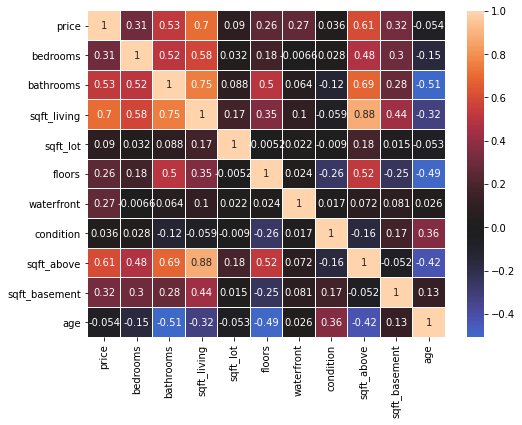

In [196]:
# Is there any correlation between features?
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6)) 
corr = data.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

### 1.2. The target is numeric
We want to build the model that *predicts* house prices: we look into `sklearn.neighbors` [library](https://scikit-learn.org/stable/modules/neighbors.html). There are several modules in this library. Which one do you think we need to use in order to predict prices?

In [197]:
# split data into features and target variable
X = data.drop(columns=['price' ])
Y = data['price'].values

In order to split the dataset into train and test parts we can use `train_test_split` method from `sklearn.model_selection` module. We set the test set size to be 20% of the entire dataset. This way of splitting the data into train and test sets is called **holdout estimation**: we are holding out part of the data to see how the predictor performs on data that it has never seen.

In [198]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

We now buid our model. What do you think happens when we call `knn.fit`? What computation is run? 

Explore all different algorithms [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms).

Does the the use of a different algorithm make the model itself different? What is the difference between the algorithms?

What does the `weight` parameter specify?

In [199]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [200]:
# train set score
knn.score(X_train, Y_train)

0.7319569533015059

In [201]:
# test set score
knn.score(X_test, Y_test)

0.4662046281242298

With all imaginable improvements I was unable to get the test accuracy above $0.60$.

## 2. Predicting home price class
It does not seem that we can reliably predict the numeric home price using the data and the `KNeighborsRegressor`.

Instead we are going to use `KNeighborsClassifier` to predict a class label of each home.

### 2.1. Converting target variable into a class label
Convert the numeric price attribute into the binary class as follows: "price above mean" (class 1) and "price below mean" (class 0).

In [202]:
# converting target attribute to a class label
data = pd.read_csv(file_name, index_col='id')

data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

def get_attribute_at_index(attributes, index): # gets the value of the 'attributes' list at 'index'
    return attributes[index]

sum = 0
count = 0
for house in data_rows:
    for j in range(len(house)):
        if get_attribute_at_index(columns_list, j) == 'price':
            sum += house[j]
            count += 1
mean = sum / count

data.loc[data.price > mean, "price"] = 1
data.loc[data.price != 1.0, "price"] = 0

To make sure that both classes are represented properly, find out how many total houses are above mean and how many are below mean.

In [203]:
# How many houses belong to class 0 and to class 1?
data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

above = 0
below_or_equal = 0
for house in data_rows:
    for j in range(len(house)):
        if get_attribute_at_index(columns_list, j) == 'price':
            if house[j] == 1:
                above += 1
            elif house[j] == 0:
                below_or_equal += 1
print(above, below_or_equal)

7919 13694


### 2.2. Baseline experiment

Repeat the same steps as in 1.2. using transformed dataset and `KNeighborsClassifier`.

In [204]:
# we repeat the same steps but with a categorical class label
# split data into features and target variable
X = data.drop(columns=['price'])
Y = data['price'].values


# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [205]:
# we use a clasifier instead of regressor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [206]:
print("Baseline train score:", knn.score(X_train, Y_train))
print("Baseline test score:", knn.score(X_test, Y_test))

Baseline train score: 0.8637941006362059
Baseline test score: 0.7665972704140643


### 2.3. Normalizing numeric attributes
The k-Nearest Neighbor classifier uses distance to find $K$ nearest neighbors. Distance metric is very sensitive to the scale of numeric attributes. For example, the *sqft_living* is represented as three- to four-digit numbers, and the numer of *bedrooms* is in single digits. Thus the distance across *sqft_living* would dominate the distance across the *bedrooms* dimension. To avoid this scale-related bias, we need to project all numeric values into interval from 0 to 1. 

Perform data normalization in the cell below.

In [207]:
# normalizing numeric fields
# You can write a simple loop over all columns in data
# Use np.min and np.max
# Alternatively you can use sklearn.preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

scaler = MinMaxScaler()

normalized_data_rows = scaler.fit_transform(data_rows)

data = pd.DataFrame(normalized_data_rows, columns = columns_list)


Repeat the same experiment but with normalized data. Did your model improve?

In [208]:
# we repeat the same steps but with normalized data
# split data into features and target variable
X = data.drop(columns=['price' ])
Y = data['price'].values


# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Build a classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

print("Normalized train score:", knn.score(X_train, Y_train))
print("Normalized test score:", knn.score(X_test, Y_test))

Normalized train score: 0.8761711972238289
Normalized test score: 0.7716863289382373


### 2.4. Adding expert knowledge
Now that we removed the scale bias of each feature by projecting all of them into the same interval $[0,1]$, we want to introduce some bias based on the expert knowledge. 

Look at the correlation map. Which attributes are highly correlated with price? How can we make them contribute more to the overall distance between the houses?

In [209]:
# increase distances across important attributes
data['sqft_above'] = 1.3 * data['sqft_above']
data['bathrooms'] = 1.1 * data['bathrooms']



Repeat the same experiment but with added bias. Did you get better results?

In [210]:
# we repeat the same steps but with added bias
# split data into features and target variable
X = data.drop(columns=['price'])
Y = data['price'].values


# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

print("Expert train score:", knn.score(X_train, Y_train))
print("Expert test score:", knn.score(X_test, Y_test))

Expert train score: 0.8751301330248699
Expert test score: 0.7749248207263475


### 2.5. Neighbor voting
Look closely at the `weights` parameter of the `KNeighborsClassifier`. How can we make the nearer neighbors contribute more to the decision about the class? 

Run the same experiment as in 2.4 but with weighted distance from the neighbors. Did you get better results?

In [211]:
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, Y_train)

print("Weighted distance train score:", knn.score(X_train, Y_train))
print("Weighted distance score:", knn.score(X_test, Y_test))

Weighted distance train score: 0.9997108155002892
Weighted distance score: 0.7707610455702059


### 2.6. Cross-validation

To produce a more reliable estimation of the model performance we are going to use **cross-validation** instead of holdout estimation. 

Cross-validation is when the dataset is randomly split up into $m$ groups (called $folds$). One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group has been used as the test set. For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. 

Cross-validation is more reliable than the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

Repeat the experiment from 2.5, but using the entire sets X and Y, and 10-fold cross-validation. You can use `sklearn.model_selection.cross_val_score` to compute the scores for each fold: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

You should print all the scores and report the mean. Notice how the score for each fold is slightly different. The cross-validation helps to make model validation more reliable.

In [212]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3, weights="distance")


# train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.78075856 0.77104533 0.76734505 0.76816289 0.76816289 0.77140213
 0.77140213 0.7653864  0.76584914 0.75057844]
cv_scores mean:0.7680092943574193


### 2.7. Finding the best value of $K$
As explained in the lecture, the best value of $K$ can be found using cross-validation. If $K$ is small, then it might be not enough information from the neighbors to correctly predict the target variable. If the number of neighbors is too big, then the prediction will incorporate noise (overfitting).

We are going to run our classification with different values of $K$, to determine the best value that produces the highest score for the test data. 

Conduct a series of experiments varying $K$ from 1 to 35, and for each experiment perform 20-fold cross-validation. For this we can use `sklearn.model_selection.GridSearchCV`: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

In a nutshell, you create a new knn classifier, without specifying the value of $K$. You also create a parameter `grid_dictionary`, where the key is `n_neighbors` and the value is `np.range(1,35)`.
Then you call the `GridSearchCV` passing as parameters the knn classifier, parameter grid, and `cv`-the number of folds for cross-validation. 

Finally, you fit the data, and wait until all the experiments are finished.

In [227]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier(weights="distance")

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.array([s for s in range(1, 36)])}

#use gridsearch to test all values for n_neighbors
cv = GridSearchCV(knn, grid_dictionary, cv=20)

#fit model to data
cv.fit(X, Y)



GridSearchCV(cv=20, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])})

What is the best value of $K$? We can find out by looking into `best_params_` field of the `GridSearchCV` object.

In [228]:
# check top-performing n_neighbors value
print(cv.best_params_)

{'n_neighbors': 35}


### 2.8. Final model
Repeat the final cross-validation experiment with the best value of $K$ and compute the mean of the cross-validation score for our final model (cv=20).

In [230]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=35, weights="distance")


# train model with cv of 20 
cv_scores = cross_val_score(knn_cv, X, Y, cv=20)



#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.82053654 0.79648474 0.80296022 0.81128585 0.78445883 0.80296022
 0.79740981 0.81036078 0.81036078 0.79000925 0.81128585 0.78630897
 0.80851064 0.80925926 0.7962963  0.81666667 0.79537037 0.79814815
 0.81388889 0.81851852]
cv_scores mean:0.8040540309041695


If you performed all the improvements correctly, the mean cross-validation score should be at least $0.80$. This is already a somewhat useful model. Given a new house, you can feed its features into the model, and find out if it is a cheap or an expensive house - i.e. if it is priced above the mean price in the current area or below it.

Of course you are welcome to improve the model even further for additional bonus points.

### 2.9. Two houses
We have our two houses for sale. The data about them is in file [two_houses.csv](https://docs.google.com/spreadsheets/d/1zhg47gv5pGdlMsPnz2USeOCWcJv74hmWJkMYh92mIXM/edit?usp=sharing).

We can build the model using the entire dataset (X, Y).

We want to predict the class label of these two houses. 

Do not forget to perform the same transformations on the new data as you performed on the original dataset.

In [243]:
knn_full = KNeighborsClassifier(n_neighbors=35, weights='distance')
knn_full.fit(X, Y)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [244]:
test_file_name = "../datasets/two_houses.csv"

In [247]:
# Test data transformation

# converting target attribute to a class label
data = pd.read_csv(test_file_name, index_col='id')

data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

def get_attribute_at_index(attributes, index): # gets the value of the 'attributes' list at 'index'
    return attributes[index]

sum = 0
count = 0
for house in data_rows:
    for j in range(len(house)):
        if get_attribute_at_index(columns_list, j) == 'price':
            sum += house[j]
            count += 1
mean = sum / count

data.loc[data.price > mean, "price"] = 1
data.loc[data.price != 1.0, "price"] = 0

# normalizing data
data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

scaler = MinMaxScaler()

normalized_data_rows = scaler.fit_transform(data_rows)

data = pd.DataFrame(normalized_data_rows, columns = columns_list)

data['sqft_above'] = 1.3 * data['sqft_above']
data['bathrooms'] = 1.1 * data['bathrooms']

y = data['price'].to_numpy().tolist()
x = data.drop(columns=['price'])


In [248]:
y_predicted = knn_full.predict(x)
print("Predicted price:",y_predicted )
print("Actual price:",y)

Predicted price: [0. 1.]
Actual price: [0.0, 1.0]


This is the end of the KNN lab.

Copyright &copy; 2020 Marina Barsky. All rights reserved.